In [ ]:
# Montez Google Drive pour accéder aux fichiers
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Brief_Mask/"

01.jpeg  encoder.py	      Mo_Mask_Detect.ipynb
02.jpeg  face_names.npy       tests
03.jpeg  fruit-and-vgg.ipynb  transfert_learning_VGG16_Masks.ipynb
04.jpeg  Mask_Data	      tutorial-cnn-partie-3-mod-le-vgg16.ipynb


In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import choice
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Model, Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Définissez le chemin vers votre ensemble de données
dataset_path = '/content/drive/My Drive/Brief_Mask/Mask_Data'

In [ ]:
class_name = choice(['without_mask', 'with_mask'])
class_path = os.path.join(dataset_path, class_name)

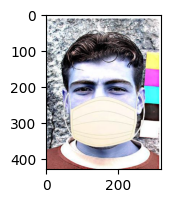

In [ ]:
image_name = choice(os.listdir(class_path))
image_path = os.path.join(class_path, image_name)

# Read and Display the random image
image = cv2.imread(image_path)
plt.figure(figsize=(2, 2))
plt.imshow(image)
plt.show()

In [ ]:
# biblioteque d'aplicatif pour les données  d'entraînement
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# biblioteque d'aplicatif pour les données de validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Define the batch size
batch_size = 32

# générateurs de données d'entraînement et de validation
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    classes=['without_mask', 'with_mask'])

val_generator = val_datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    classes=['without_mask', 'with_mask'],
    shuffle=False)

Found 1508 images belonging to 2 classes.
Found 1508 images belonging to 2 classes.


In [ ]:
from keras.applications.vgg16 import VGG16
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model


# Add a new fully connected layer
x = Flatten()(vgg16.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create a new model
model = Model(inputs=vgg16.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay          79G   27G   52G  34% /
tmpfs            64M     0   64M   0% /dev
shm             5.7G     0  5.7G   0% /dev/shm
/dev/root       2.0G  1.1G  887M  55% /usr/sbin/docker-init
tmpfs           6.4G   64K  6.4G   1% /var/colab
/dev/sda1        50G   29G   22G  58% /opt/bin/.nvidia
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
drive            15G  1.7G   14G  11% /content/drive


In [ ]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=7)

# 4minutes in T4googleColab
# loss: 0.0056 - accuracy: 0.9993 - val_loss: 0.0046 - val_accuracy: 0.9993

Epoch 1/7
47/47 [==============================] - 286s 6s/step - loss: 0.3680 - accuracy: 0.9018 - val_loss: 0.0303 - val_accuracy: 0.9867
Epoch 2/7
47/47 [==============================] - 35s 739ms/step - loss: 0.0318 - accuracy: 0.9892 - val_loss: 0.0139 - val_accuracy: 0.9947
Epoch 3/7
47/47 [==============================] - 32s 685ms/step - loss: 0.0185 - accuracy: 0.9934 - val_loss: 0.0180 - val_accuracy: 0.9934
Epoch 4/7
47/47 [==============================] - 34s 736ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 5/7
47/47 [==============================] - 33s 706ms/step - loss: 0.0046 - accuracy: 0.9986 - val_loss: 0.0157 - val_accuracy: 0.9940
Epoch 6/7
47/47 [==============================] - 34s 712ms/step - loss: 0.0551 - accuracy: 0.9824 - val_loss: 0.0880 - val_accuracy: 0.9854
Epoch 7/7
47/47 [==============================] - 33s 708ms/step - loss: 0.1544 - accuracy: 0.9661 - val_loss: 0.0151 - val_accuracy: 0.9947


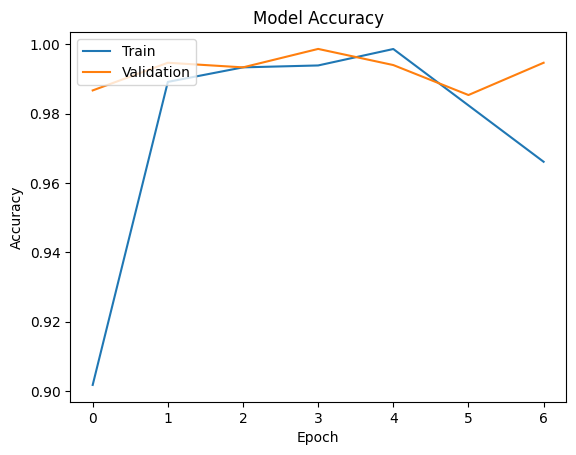

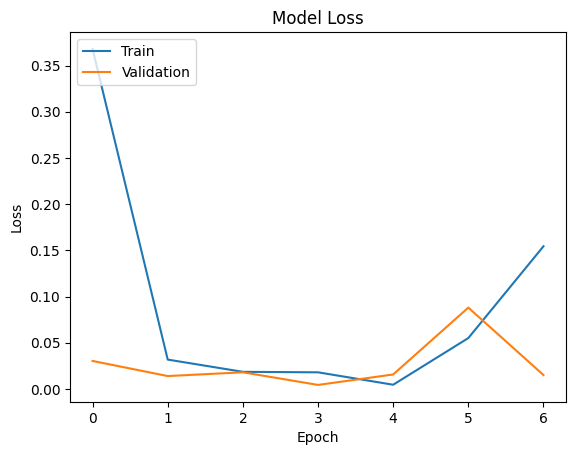

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

print()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:

def preprocess_image_to_test(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Resize the image while maintaining its aspect ratio
    h, w, _ = image.shape
    if h > w:
        ratio = 224 / h
    else:
        ratio = 224 / w
    resized_img = cv2.resize(image, (int(w * ratio), int(h * ratio)), interpolation=cv2.INTER_AREA)

    # Add padding to make the image 224x224
    h, w, _ = resized_img.shape
    pad_h = (224 - h) // 2
    pad_w = (224 - w) // 2
    padded_img = cv2.copyMakeBorder(resized_img, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_CONSTANT)

    # Preprocess the image
    image = np.expand_dims(padded_img, axis=0)
    image = image / 255.0

    # Resize the image to (224, 224, 3)
    image = cv2.resize(image[0], (224, 224), interpolation=cv2.INTER_AREA)
    image = np.expand_dims(image, axis=0)

    return image

In [ ]:
test_path = '/content/drive/My Drive/Brief_Mask/tests'
# Load some images to test
test01 = preprocess_image_to_test(f'{test_path }/01.jpg')
test02 = preprocess_image_to_test(f'{test_path }/02.jpg')
test03 = preprocess_image_to_test(f'{test_path }/03.jpg')
test04 = preprocess_image_to_test(f'{test_path }/04.jpg')


AttributeError: ignored

In [ ]:
test01.shape

In [ ]:
# Display the test images
plt.subplot(2, 2, 1)
plt.imshow(test01[0])
plt.title('test01.jpg')

plt.subplot(2, 2, 2)
plt.imshow(test02[0])
plt.title('test02.jpg')

plt.subplot(2, 2, 3)
plt.imshow(test03[0])
plt.title('test03.jpg')

plt.subplot(2, 2, 4)
plt.imshow(test04[0])
plt.title('test04.jpg')

plt.show()

In [ ]:
# Make predictions
prediction01 = model.predict(test01)
prediction02 = model.predict(test02)
prediction03 = model.predict(test03)
prediction04 = model.predict(test04)

print()

# Print the predictions
if prediction01 < 0.5:
    print('The person in test01.jpg is not wearing a mask.')
else:
    print('The person in test01.jpg is wearing a mask.')

if prediction02 < 0.5:
    print('The person in test02.jpg is not wearing a mask.')
else:
    print('The person in test02.jpg is wearing a mask.')

if prediction03 < 0.5:
    print('The person in test03.jpg is not wearing a mask.')
else:
    print('The person in test03.jpg is wearing a mask.')

if prediction04 < 0.5:
    print('The person in test04.jpg is not wearing a mask.')
else:
    print('The person in test04.jpg is wearing a mask.')